In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set_theme()

In [ ]:
def get_data(path):
    review = []
    score = []
    files = glob.glob(f'{path}/*.txt')
    for file in files:
        score.append(int(file.split('_')[-1].split('.')[0]))
        with open(file, "r", encoding='utf-8') as f:
            review.append(f.read())
    return review, score


def get_dataframe(path):
    review, score = get_data(f'{path}/pos/')
    pos = pd.DataFrame({'review': review, 'label': 1, 'score': score})
    review, score = get_data(f'{path}/neg/')
    neg = pd.DataFrame({'review': review, 'label': 0, 'score': score})
    df = pd.concat([pos, neg], ignore_index=True)
    return df

In [ ]:
train = get_dataframe('/content/aclImdb/train')
test = get_dataframe('/content/aclImdb/train')
df = pd.concat([train, test], ignore_index=True)
for i in df.sample(15).review:
  print(i)

After having seen the movie the first question arising in my mind was: Is this supposed to be irony or not? After reading a few comments about the character Doc Savage and the comic series, I knew this film was not meant to be ironic. So, the story tells us about an US-American Super-Doc saving a south American republic from evil. Sounds like a typical story. But this one comes in such an unrealistic way that it becomes ridiculous. The mandatory end-fight shows the worst presentation of martial arts I have ever seen. The film might be interesting for low budget movie designers as a bad example.
Like most other reviewers I have first seen this movie (on TV, never on the big screen), when I was a teenager. My Dad has always regarded this film highly and recommended it to me then, and I must say he was not only right, but this movie has stayed with me forever in the more than 2 decades since I saw it first time. I have seen it two or three more times since then (just a few days ago I gave

<Axes: xlabel='score', ylabel='count'>

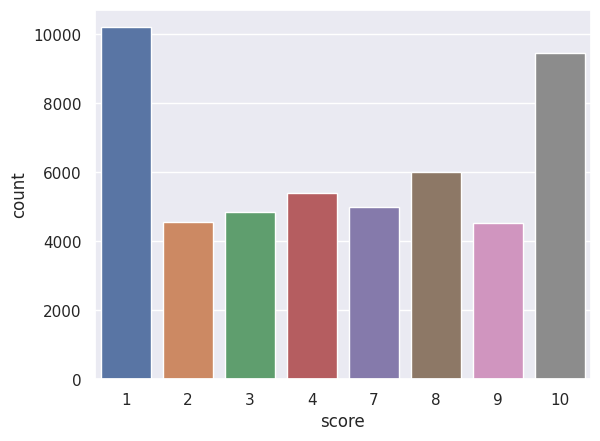

In [ ]:
sns.countplot(x=df.score)

В столбе оценки в данных имеется небольшой дизбаланс классов и отсутствие 5 и 6 класса, поэтому при обучении возможно потребуется установить веса для классов

<Axes: xlabel='label', ylabel='count'>

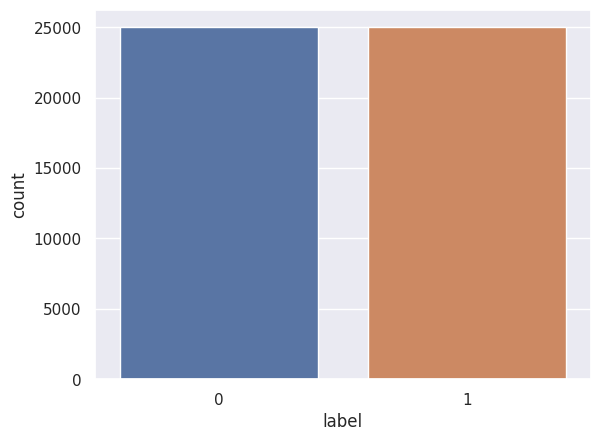

In [ ]:
sns.countplot(x=df.label)

в столбце статуса в данных классы сбалансированы

count    50000.000000
mean       233.776720
std        173.713681
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: review, dtype: float64


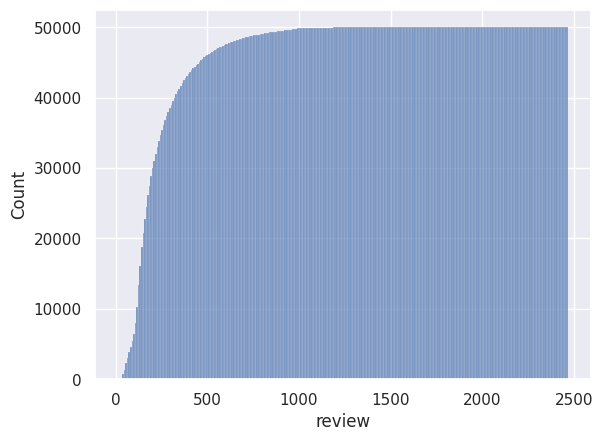

In [ ]:
sns.histplot(x=df.review.str.split(' ').str.len(), cumulative=True)
print(df.review.str.split(' ').str.len().describe())


в 95% предложений содержится не больше 500 слов, исключис стопслова и проверим ещё раз

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: xlabel='review', ylabel='Count'>

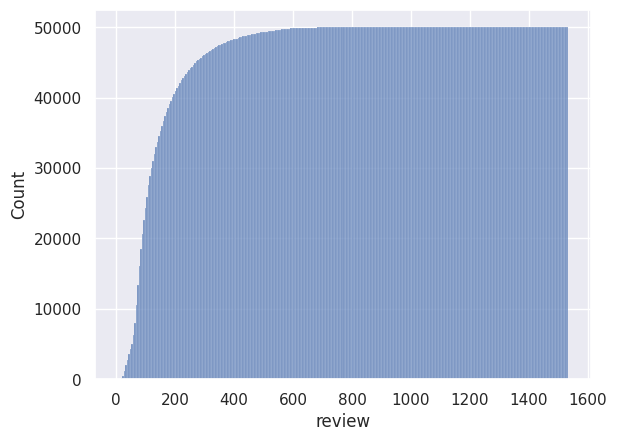

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.remove('not')

def process_stopword(data):
  return ' '.join([w for w in data.split(' ') if w not in stop_words])

dt = df.review.apply(process_stopword).str.split(' ').str.len()
sns.histplot(x=dt, cumulative=True)



в 95+% предложений не больше 400 слов, таким образом max_len=400

<Axes: xlabel='review', ylabel='Count'>

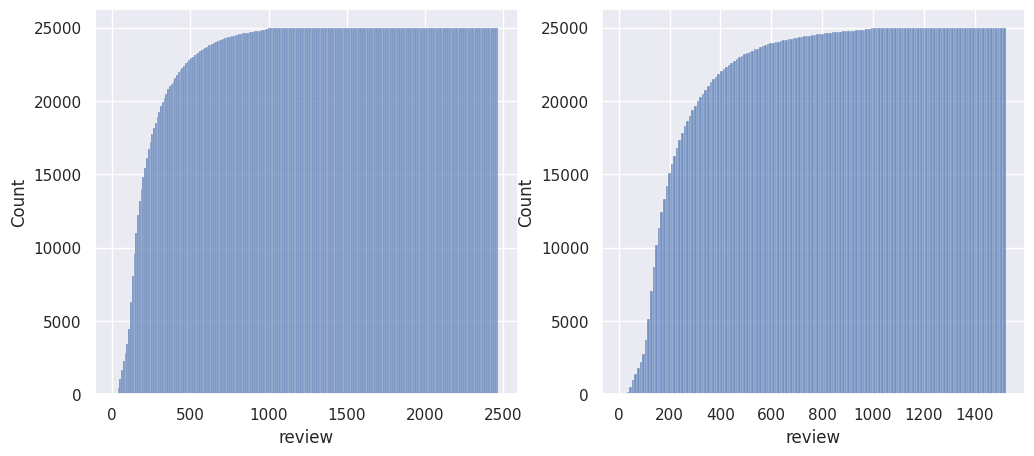

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
sns.histplot(x=df[df.label==1].review.str.split(' ').str.len(), cumulative=True,ax=ax1)
sns.histplot(x=df[df.label==0].review.str.split(' ').str.len(), cumulative=True,ax=ax2)


<Axes: xlabel='review', ylabel='Count'>

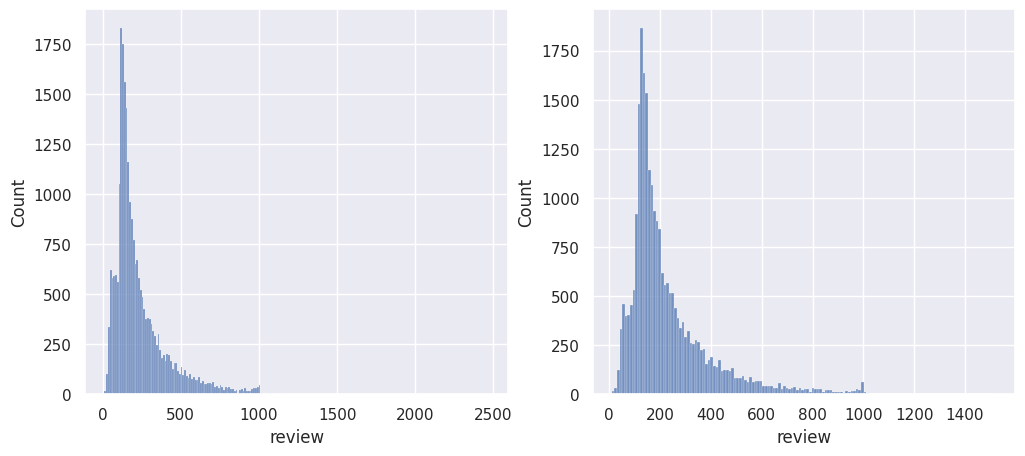

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
sns.histplot(x=df[df.label==1].review.str.split(' ').str.len(), ax=ax1)
sns.histplot(x=df[df.label==0].review.str.split(' ').str.len(), ax=ax2)